# Aufgabe 5

## Task a, b

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

In [28]:
all_names = []
all_data = []
for i in range(4):
    with open('data/xx0%d.csv' % i) as fp:
        # get name of data from file, remove newline
        all_names.append(fp.readline().split(',')[1][:-1])
        all_data.append(np.loadtxt(fp, delimiter=','))
# fix for data with one row only
all_data[2] = all_data[2].reshape((1,2))
all_names

['NLRG', 'BLRG', 'Quasar', 'LERG']

[Text(0,0.5,'$\\mathrm{Q}_{HS}/\\mathrm{erg}\\,\\mathrm{s}^{-1}$'),
 Text(0.5,0,'$\\mathrm{L}_{151}/\\mathrm{W}\\,\\mathrm{Hz}^{-1}\\,\\mathrm{Sr}^{-1}$'),
 Text(0.5,1,'Jet- und Radioleistungen von FR-I Galaxien')]

C:\tools\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


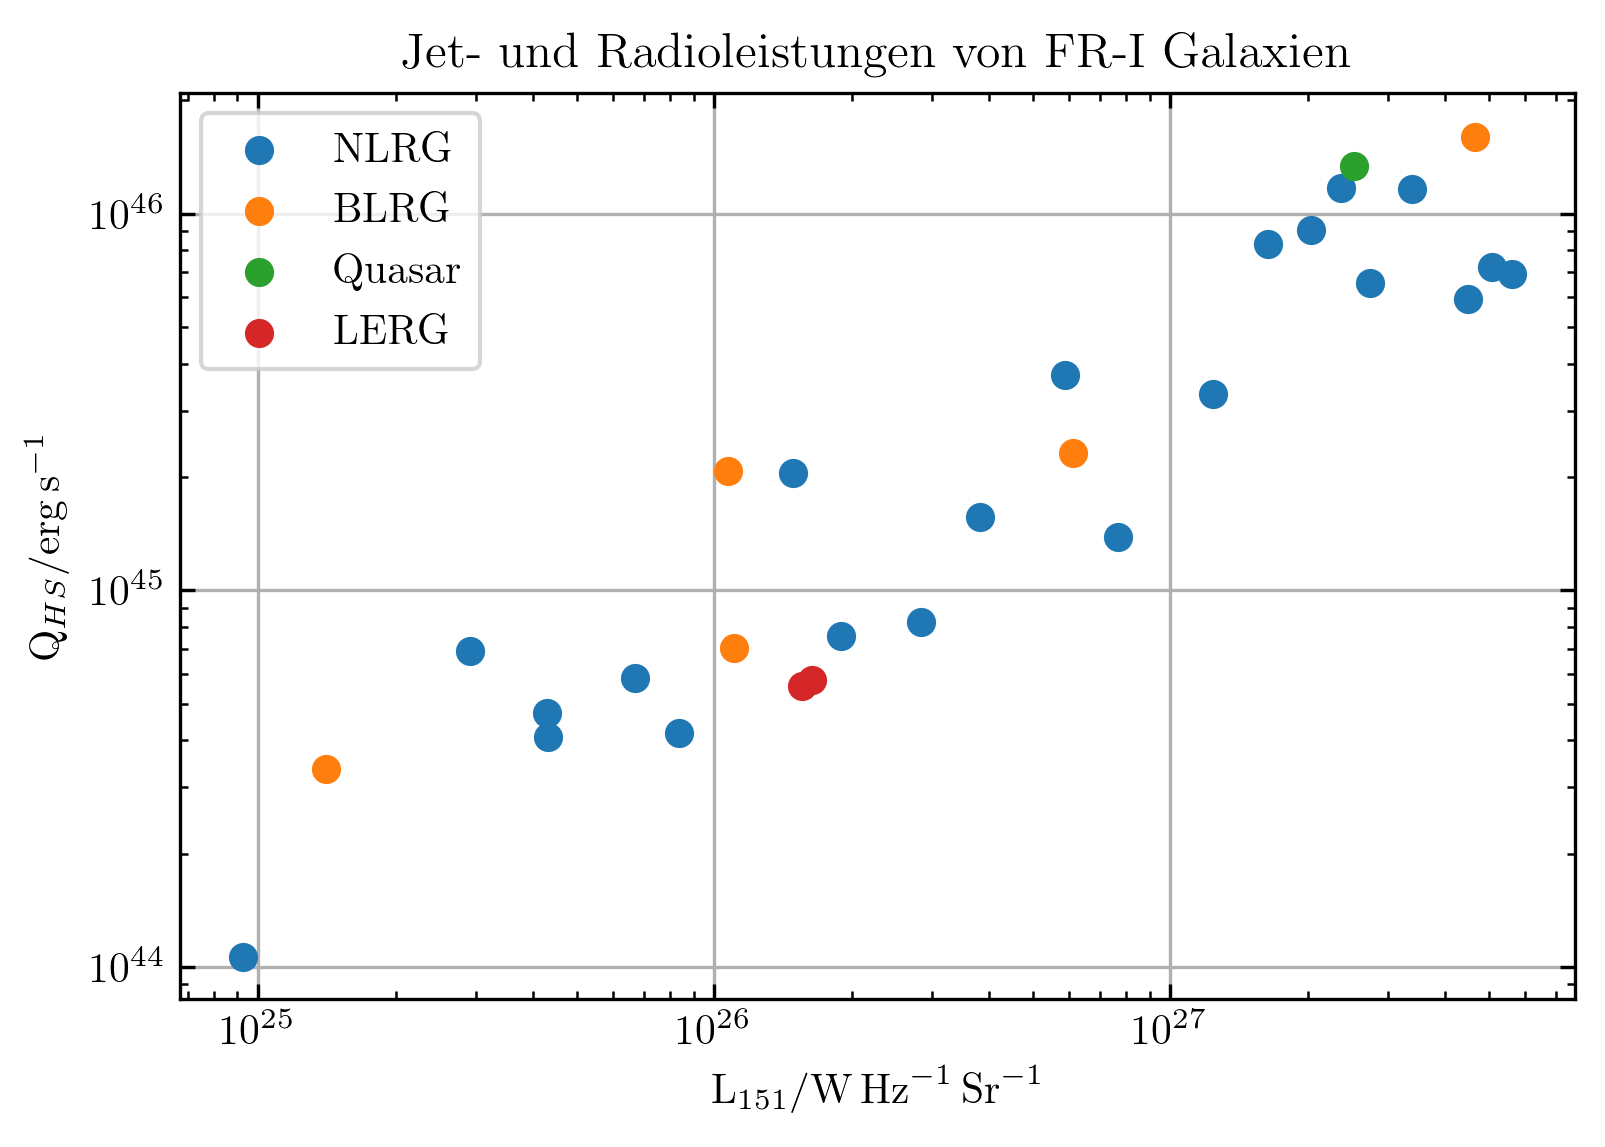

In [32]:
for data, name in zip(all_data, all_names):
    plt.scatter(data[:,0], data[:,1], label=name)
    plt.gca().set(xscale='log', yscale='log')
plt.legend()
plt.gca().set(title='Jet- und Radioleistungen von FR-I Galaxien',
              xlabel='$\mathrm{L}_{151}/\mathrm{W}\,\mathrm{Hz}^{-1}\,\mathrm{Sr}^{-1}$',
              ylabel='$\mathrm{Q}_{HS}/\mathrm{erg}\,\mathrm{s}^{-1}$')

## Task c

In [56]:
from scipy.optimize import curve_fit

In [54]:
def Q_jet(L, a, b):
    return np.float64(a*(L/10**25)**b)

In [86]:
# Arrr, ich bin ein Pirat!
all_data_arr = np.vstack(all_data)
x_arr = all_data_arr[:,0]
y_arr = all_data_arr[:,1]
fit_result, cov = curve_fit(Q_jet, x_arr, y_arr, p0=(10e45, 1))
my_a, my_b = fit_result[0], fit_result[0]

# Standardabweichung
np.sqrt(np.diag(cov))

array([2.54742727e+44, 1.08524761e-01])

In [71]:
their_a, their_b = (5e44, 0.64)

In [75]:
abs_error_a, abs_error_b = abs(my_a-their_a), abs(my_b-their_b)
# relative error
error_a/their_a, error_b/their_b

(0.18323878757433076, 0.17523260455535525)

## Task d

[Text(0,0.5,'$\\mathrm{Q}_{HS}/\\mathrm{erg}\\,\\mathrm{s}^{-1}$'),
 Text(0.5,0,'$\\mathrm{L}_{151}/\\mathrm{W}\\,\\mathrm{Hz}^{-1}\\,\\mathrm{Sr}^{-1}$'),
 Text(0.5,1,'Jet- und Radioleistungen von FR-I Galaxien')]

C:\tools\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


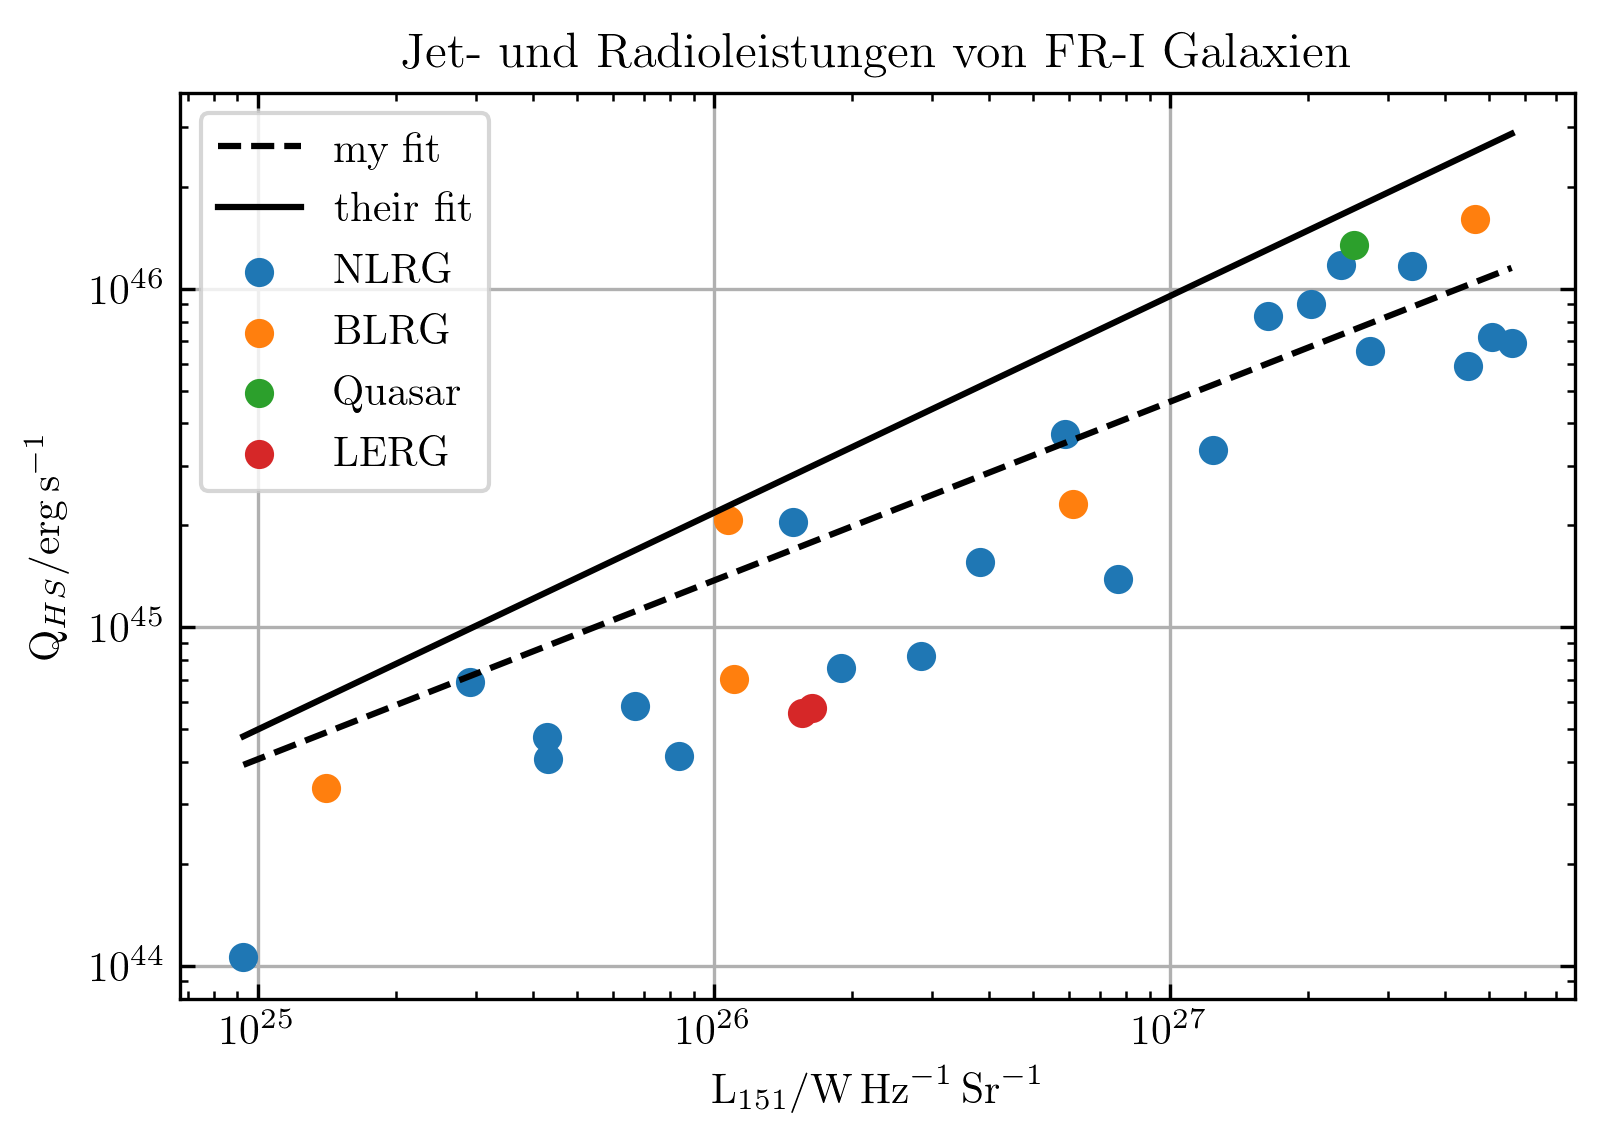

In [80]:
for data, name in zip(all_data, all_names):
    plt.scatter(data[:,0], data[:,1], label=name)
    plt.gca().set(xscale='log', yscale='log')
plt.plot(x, (lambda y: Q_jet(y, my_a, my_b))(x), '--', c='black', label='my fit')
plt.plot(x, (lambda y: Q_jet(y, their_a, their_b))(x), 'black', label='their fit')
plt.legend()
plt.gca().set(title='Jet- und Radioleistungen von FR-I Galaxien',
              xlabel='$\mathrm{L}_{151}/\mathrm{W}\,\mathrm{Hz}^{-1}\,\mathrm{Sr}^{-1}$',
              ylabel='$\mathrm{Q}_{HS}/\mathrm{erg}\,\mathrm{s}^{-1}$')